Name: `Christian Jay Baguio` </br>
Course: `Exploratory Data Analysis`

# About the Data

Distillation tower

Description:	Snapshot measurements on 27 variables from a distillation column; measured over 2.5 years.

Data source:	From an industrial source; variable names have been coded. e.g. Temp1 is a temperature, but we cannot disclose where it is measured on the column.

* Temperatures are in Fahrenheit

* Pressures are measured in bars

* FlowC1 in units of MSCFD

* FlowC3 and FlowC4 are in units of MBPD

* Temp11 = Temp3 - Temp9 = the temperature increase of the stream leaving the column and returning back, after passing through the reboiler

* InvTemp tags are 1000/temperature, therefore with units of inverted Fahrenheit

* The last column, VapourPressure, is a quality variable measured in the laboratory. The other snapshot measurements in the row correspond to the process conditions when the sample was taken.

Data shape:	253 rows and 27 columns

Usage restrictions:	None

Contact person:	Kevin Dunn

Contact details:	kgdunn@gmail.com

Added here on:	12 January 2011 13:18

Last updated:	04 May 2020 4:31

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('distillation-tower.csv')
data.head()

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
0,2000-08-21,139.9857,432.0636,377.8119,100.2204,492.1353,490.1459,180.5578,187.4331,215.0627,...,513.9653,8.6279,10.5988,30.8983,489.9900,2.0409,2.6468,2.1681,4.3524,32.5026
1,2000-08-23,131.0470,487.4029,371.3060,100.2297,482.2100,480.3128,172.6575,179.5089,205.0999,...,504.5145,8.7662,10.7560,31.9099,480.2888,2.0821,2.6932,2.2207,4.5497,34.8598
2,2000-08-26,118.2666,437.3516,378.4483,100.3084,488.7266,487.0040,165.9400,172.9262,205.0304,...,508.9997,8.5319,10.5737,29.9165,486.6190,2.0550,2.6424,2.1796,4.5511,32.1666
3,2000-08-29,118.1769,481.8314,378.0028,95.5766,493.1481,491.1137,167.2085,174.2338,205.2561,...,514.1794,8.6260,10.6695,30.6229,491.1304,2.0361,2.6455,2.1620,4.5464,30.4064
4,2000-08-30,120.7891,412.6471,377.8871,92.9052,490.2486,488.6641,167.0326,173.9681,205.0883,...,511.0948,8.5939,10.4922,29.4977,487.6475,2.0507,2.6463,2.1704,4.5499,30.9238


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            253 non-null    object 
 1   Temp1           253 non-null    float64
 2   FlowC1          253 non-null    float64
 3   Temp2           253 non-null    float64
 4   TempC1          253 non-null    float64
 5   Temp3           253 non-null    float64
 6   TempC2          253 non-null    float64
 7   TempC3          253 non-null    float64
 8   Temp4           253 non-null    float64
 9   PressureC1      253 non-null    float64
 10  Temp5           253 non-null    float64
 11  Temp6           253 non-null    float64
 12  OC1             253 non-null    float64
 13  Temp7           253 non-null    float64
 14  Temp8           253 non-null    float64
 15  TempC9          253 non-null    float64
 16  FlowC2          253 non-null    float64
 17  Temp9           253 non-null    flo

In [4]:
data.isna().sum()

Date              0
Temp1             0
FlowC1            0
Temp2             0
TempC1            0
Temp3             0
TempC2            0
TempC3            0
Temp4             0
PressureC1        0
Temp5             0
Temp6             0
OC1               0
Temp7             0
Temp8             0
TempC9            0
FlowC2            0
Temp9             0
Temp10            0
FlowC3            0
FlowC4            0
Temp11            0
Temp12            0
InvTemp1          0
InvTemp2          0
InvTemp3          0
InvPressure1      0
VapourPressure    0
dtype: int64

In [5]:
data.describe()

,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,Temp5,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,132.441662,308.878978,372.272493,101.924035,482.471458,480.821533,175.194760,181.729203,238.590831,478.745147,...,497.979526,6.671970,8.227488,21.802075,480.328241,2.085068,2.690532,2.173966,3.960810,36.649317
std,12.026306,83.406894,14.757763,15.093537,18.548515,18.580542,13.943948,14.067880,13.924949,18.536614,...,20.487860,1.168602,1.549983,5.200383,18.562388,0.082170,0.109806,0.084598,0.232725,6.841153
min,111.025900,174.742800,318.447000,75.584700,420.777700,419.017500,119.214000,124.599400,199.823400,418.619400,...,432.448300,4.617000,5.847000,12.885700,419.427400,1.900600,2.458600,1.971200,3.713500,25.156000
25%,121.602000,235.286300,362.766400,88.979000,471.457000,469.819900,169.516300,176.270900,225.830200,467.591100,...,485.878600,5.577700,6.867600,17.554300,468.911600,2.029300,2.610100,2.121100,3.777400,31.980800
50%,130.170300,292.910900,373.380100,100.220400,483.847800,482.257700,175.550900,182.210200,241.410400,480.201800,...,498.954700,6.523900,7.992700,20.480300,482.054100,2.074500,2.678200,2.164200,3.904600,34.849700
75%,140.520900,370.814200,383.123900,116.323200,495.428300,493.491500,183.770700,190.471500,250.039600,490.862100,...,513.039300,7.584500,9.901000,25.518200,492.791500,2.132600,2.756600,2.226000,4.157600,40.639900
max,168.040200,505.668100,406.740000,132.199400,528.080700,526.392000,229.411100,235.624400,254.590000,524.787700,...,547.132800,8.847300,10.756000,35.525400,526.143700,2.384200,3.140200,2.498000,4.661600,64.313500


# <center> `Z-Score Treatment`

b. Have an analysis and perform necessary treatment/s for outliers


In [6]:
data.sample(5)

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
60,2001-02-28,127.1793,294.8810,382.4230,100.8038,486.0181,484.2697,174.5972,181.3818,250.9335,...,503.0966,4.9781,6.9966,16.4585,482.0579,2.0744,2.6149,2.1297,3.7646,34.0628
33,2000-12-20,135.0188,315.2029,388.8798,112.7397,501.0710,498.7241,188.5854,195.3234,249.9384,...,520.9275,5.5567,6.8676,18.3071,499.1228,2.0035,2.5715,2.0714,3.7788,28.0504
13,2000-09-20,120.8585,479.9308,369.6658,94.6970,481.8801,480.4957,168.2200,174.7861,200.1040,...,504.8444,8.3738,10.5319,32.2571,480.4214,2.0815,2.7051,2.2241,4.6555,33.9831
199,2002-09-22,130.1449,218.7684,379.6459,114.7861,478.8128,477.1987,174.1088,180.5563,225.1212,...,489.5984,5.5664,6.4204,15.2878,477.2757,2.0952,2.6340,2.1574,4.1698,33.2634
43,2001-01-13,121.6367,265.7736,368.9541,113.6703,473.0196,471.1396,162.1229,168.5968,249.9528,...,490.2544,5.4378,7.4291,16.7685,470.9668,2.1233,2.7104,2.1918,3.7786,39.8345


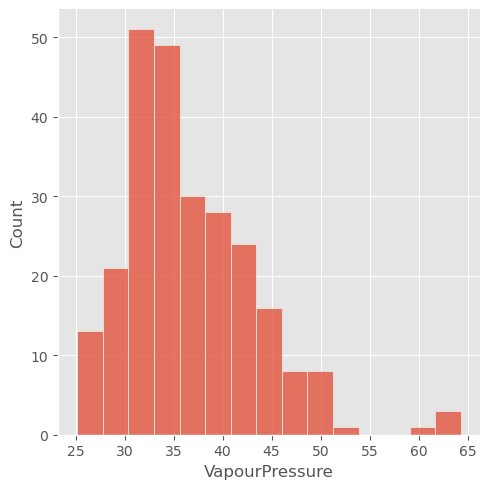

In [7]:
sns.displot(data['VapourPressure'])

Finding the boundary values.

In [8]:
print('Highest VapourPressure Allowed', data['VapourPressure'].mean() + 3*data['VapourPressure'].std())
print('Lowest VapourPressure Allowed', data['VapourPressure'].mean() - 3*data['VapourPressure'].std())

Highest VapourPressure Allowed 57.17277713118209
Lowest VapourPressure Allowed 16.125856860912773


Finding outliers.

In [9]:
data[(data['VapourPressure'] > 57.17) | (data['VapourPressure'] < 16.12)]

#there are 4 outliers who exceed the highest vapourpreasure

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
37,2000-12-31,129.8204,330.5261,332.2936,109.8136,442.6475,440.2627,177.7870,184.9427,250.0396,...,464.9925,6.4536,8.4998,29.8458,440.3035,2.2712,3.0094,2.4225,3.7774,64.2744
233,2002-12-20,136.1624,219.8676,319.6830,123.3329,420.7777,419.0175,176.2083,182.2947,225.3571,...,432.4483,5.2774,5.9340,20.4612,419.4274,2.3842,3.1281,2.4980,4.1657,64.2496
234,2002-12-22,139.5044,223.4113,318.4470,124.1195,424.2567,422.5136,179.3541,185.5565,230.0852,...,435.8587,5.0894,5.9073,21.4259,422.7325,2.3656,3.1402,2.4824,4.0853,64.3135
235,2002-12-27,129.6134,174.7428,329.7076,119.6253,425.6631,423.9189,169.9978,176.2988,229.2319,...,435.7392,5.5644,6.4219,16.2859,423.5193,2.3612,3.0330,2.4427,4.0996,61.3798


Trimming of outliers.

In [10]:
new_data = data[(data['VapourPressure'] > 57.17) | (data['VapourPressure'] < 16.12)]
new_data

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
37,2000-12-31,129.8204,330.5261,332.2936,109.8136,442.6475,440.2627,177.7870,184.9427,250.0396,...,464.9925,6.4536,8.4998,29.8458,440.3035,2.2712,3.0094,2.4225,3.7774,64.2744
233,2002-12-20,136.1624,219.8676,319.6830,123.3329,420.7777,419.0175,176.2083,182.2947,225.3571,...,432.4483,5.2774,5.9340,20.4612,419.4274,2.3842,3.1281,2.4980,4.1657,64.2496
234,2002-12-22,139.5044,223.4113,318.4470,124.1195,424.2567,422.5136,179.3541,185.5565,230.0852,...,435.8587,5.0894,5.9073,21.4259,422.7325,2.3656,3.1402,2.4824,4.0853,64.3135
235,2002-12-27,129.6134,174.7428,329.7076,119.6253,425.6631,423.9189,169.9978,176.2988,229.2319,...,435.7392,5.5644,6.4219,16.2859,423.5193,2.3612,3.0330,2.4427,4.0996,61.3798


Capping on outliers.

In [11]:
upper_limit = data['VapourPressure'].mean() + 3*data['VapourPressure'].std()
lower_limit = data['VapourPressure'].mean() - 3*data['VapourPressure'].std()

Apply capping.

In [12]:
data['VapourPressure'] = np.where(
    data['VapourPressure'] > upper_limit, upper_limit,
    np.where(
        data['VapourPressure'] < lower_limit, lower_limit,
        data['VapourPressure']
    )
)

In [13]:
data.describe()

,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,Temp5,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,132.441662,308.878978,372.272493,101.924035,482.471458,480.821533,175.194760,181.729203,238.590831,478.745147,...,497.979526,6.671970,8.227488,21.802075,480.328241,2.085068,2.690532,2.173966,3.960810,36.548423
std,12.026306,83.406894,14.757763,15.093537,18.548515,18.580542,13.943948,14.067880,13.924949,18.536614,...,20.487860,1.168602,1.549983,5.200383,18.562388,0.082170,0.109806,0.084598,0.232725,6.477800
min,111.025900,174.742800,318.447000,75.584700,420.777700,419.017500,119.214000,124.599400,199.823400,418.619400,...,432.448300,4.617000,5.847000,12.885700,419.427400,1.900600,2.458600,1.971200,3.713500,25.156000
25%,121.602000,235.286300,362.766400,88.979000,471.457000,469.819900,169.516300,176.270900,225.830200,467.591100,...,485.878600,5.577700,6.867600,17.554300,468.911600,2.029300,2.610100,2.121100,3.777400,31.980800
50%,130.170300,292.910900,373.380100,100.220400,483.847800,482.257700,175.550900,182.210200,241.410400,480.201800,...,498.954700,6.523900,7.992700,20.480300,482.054100,2.074500,2.678200,2.164200,3.904600,34.849700
75%,140.520900,370.814200,383.123900,116.323200,495.428300,493.491500,183.770700,190.471500,250.039600,490.862100,...,513.039300,7.584500,9.901000,25.518200,492.791500,2.132600,2.756600,2.226000,4.157600,40.639900
max,168.040200,505.668100,406.740000,132.199400,528.080700,526.392000,229.411100,235.624400,254.590000,524.787700,...,547.132800,8.847300,10.756000,35.525400,526.143700,2.384200,3.140200,2.498000,4.661600,57.172777


# <center> `IQR based filtering` 

In [14]:
data.head()

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
0,2000-08-21,139.9857,432.0636,377.8119,100.2204,492.1353,490.1459,180.5578,187.4331,215.0627,...,513.9653,8.6279,10.5988,30.8983,489.9900,2.0409,2.6468,2.1681,4.3524,32.5026
1,2000-08-23,131.0470,487.4029,371.3060,100.2297,482.2100,480.3128,172.6575,179.5089,205.0999,...,504.5145,8.7662,10.7560,31.9099,480.2888,2.0821,2.6932,2.2207,4.5497,34.8598
2,2000-08-26,118.2666,437.3516,378.4483,100.3084,488.7266,487.0040,165.9400,172.9262,205.0304,...,508.9997,8.5319,10.5737,29.9165,486.6190,2.0550,2.6424,2.1796,4.5511,32.1666
3,2000-08-29,118.1769,481.8314,378.0028,95.5766,493.1481,491.1137,167.2085,174.2338,205.2561,...,514.1794,8.6260,10.6695,30.6229,491.1304,2.0361,2.6455,2.1620,4.5464,30.4064
4,2000-08-30,120.7891,412.6471,377.8871,92.9052,490.2486,488.6641,167.0326,173.9681,205.0883,...,511.0948,8.5939,10.4922,29.4977,487.6475,2.0507,2.6463,2.1704,4.5499,30.9238


In [15]:
print(data.shape)
print(data.columns)
print(data.dtypes)

(253, 28)
Index(['Date', 'Temp1', 'FlowC1', 'Temp2', 'TempC1', 'Temp3', 'TempC2',
       'TempC3', 'Temp4', 'PressureC1', 'Temp5', 'Temp6', 'OC1', 'Temp7',
       'Temp8', 'TempC9', 'FlowC2', 'Temp9', 'Temp10', 'FlowC3', 'FlowC4',
       'Temp11', 'Temp12', 'InvTemp1', 'InvTemp2', 'InvTemp3', 'InvPressure1',
       'VapourPressure'],
      dtype='object')
Date               object
Temp1             float64
FlowC1            float64
Temp2             float64
TempC1            float64
Temp3             float64
TempC2            float64
TempC3            float64
Temp4             float64
PressureC1        float64
Temp5             float64
Temp6             float64
OC1               float64
Temp7             float64
Temp8             float64
TempC9            float64
FlowC2            float64
Temp9             float64
Temp10            float64
FlowC3            float64
FlowC4            float64
Temp11            float64
Temp12            float64
InvTemp1          float64
InvTemp2          

In [16]:
data.describe()

,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,Temp5,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,132.441662,308.878978,372.272493,101.924035,482.471458,480.821533,175.194760,181.729203,238.590831,478.745147,...,497.979526,6.671970,8.227488,21.802075,480.328241,2.085068,2.690532,2.173966,3.960810,36.548423
std,12.026306,83.406894,14.757763,15.093537,18.548515,18.580542,13.943948,14.067880,13.924949,18.536614,...,20.487860,1.168602,1.549983,5.200383,18.562388,0.082170,0.109806,0.084598,0.232725,6.477800
min,111.025900,174.742800,318.447000,75.584700,420.777700,419.017500,119.214000,124.599400,199.823400,418.619400,...,432.448300,4.617000,5.847000,12.885700,419.427400,1.900600,2.458600,1.971200,3.713500,25.156000
25%,121.602000,235.286300,362.766400,88.979000,471.457000,469.819900,169.516300,176.270900,225.830200,467.591100,...,485.878600,5.577700,6.867600,17.554300,468.911600,2.029300,2.610100,2.121100,3.777400,31.980800
50%,130.170300,292.910900,373.380100,100.220400,483.847800,482.257700,175.550900,182.210200,241.410400,480.201800,...,498.954700,6.523900,7.992700,20.480300,482.054100,2.074500,2.678200,2.164200,3.904600,34.849700
75%,140.520900,370.814200,383.123900,116.323200,495.428300,493.491500,183.770700,190.471500,250.039600,490.862100,...,513.039300,7.584500,9.901000,25.518200,492.791500,2.132600,2.756600,2.226000,4.157600,40.639900
max,168.040200,505.668100,406.740000,132.199400,528.080700,526.392000,229.411100,235.624400,254.590000,524.787700,...,547.132800,8.847300,10.756000,35.525400,526.143700,2.384200,3.140200,2.498000,4.661600,57.172777


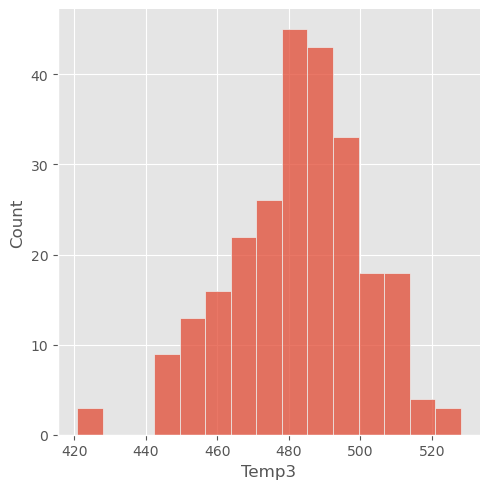

In [28]:
sns.displot(data['Temp3'])

<Axes: >

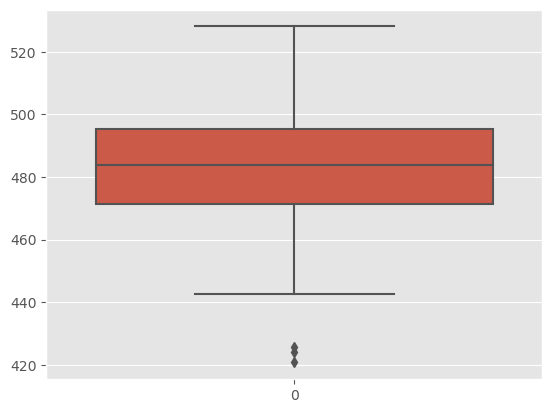

In [18]:
sns.boxplot(data['Temp3'])

Find the IQR

In [19]:
Q_1 = data['Temp3'].quantile(0.25)
Q_3 = data['Temp3'].quantile(0.75)

IQR = Q_3 - Q_1

print(IQR)

23.971299999999985


Find the upper and lower limit and finding also outliers

In [20]:
whiskers_width = 1.5
lower_lim = Q_1 - (whiskers_width * IQR)
upper_lim = Q_3 + (whiskers_width * IQR)

print([upper_lim],[lower_lim])

temp3_outliers = data[(data['Temp3'] < Q_1 - whiskers_width * IQR) | (data['Temp3'] > Q_3 + whiskers_width * IQR)]
temp3_outliers.head()

[531.3852499999999] [435.50005]


,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
233,2002-12-20,136.1624,219.8676,319.6830,123.3329,420.7777,419.0175,176.2083,182.2947,225.3571,...,432.4483,5.2774,5.9340,20.4612,419.4274,2.3842,3.1281,2.4980,4.1657,57.172777
234,2002-12-22,139.5044,223.4113,318.4470,124.1195,424.2567,422.5136,179.3541,185.5565,230.0852,...,435.8587,5.0894,5.9073,21.4259,422.7325,2.3656,3.1402,2.4824,4.0853,57.172777
235,2002-12-27,129.6134,174.7428,329.7076,119.6253,425.6631,423.9189,169.9978,176.2988,229.2319,...,435.7392,5.5644,6.4219,16.2859,423.5193,2.3612,3.0330,2.4427,4.0996,57.172777


Trimming

In [21]:
new_data = np.where(data['Temp3'] > upper_lim, upper_lim, np.where(data['Temp3'] < lower_lim, lower_lim, data['Temp3']))

Comparison plot after trimming.

<Axes: >

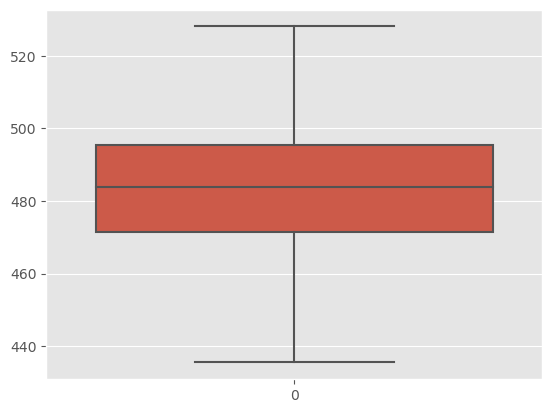

In [22]:
sns.boxplot(new_data)

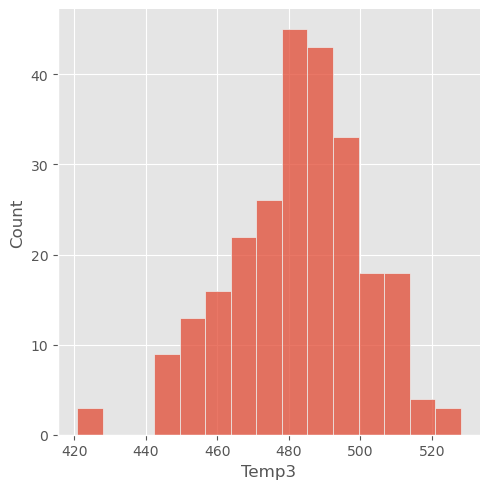

In [39]:
#plot with outliers
sns.displot(data['Temp3'])

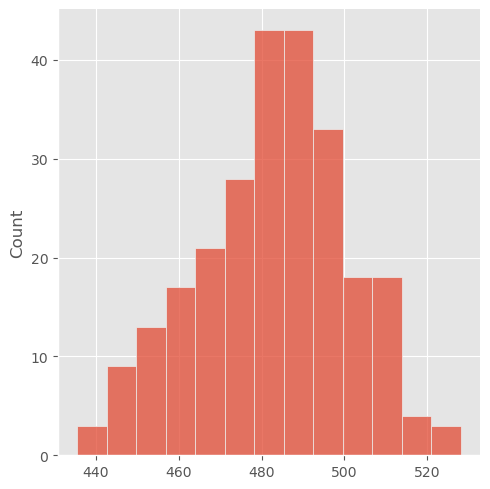

In [40]:
#plot with no outliers
sns.displot(new_data)

<Axes: >

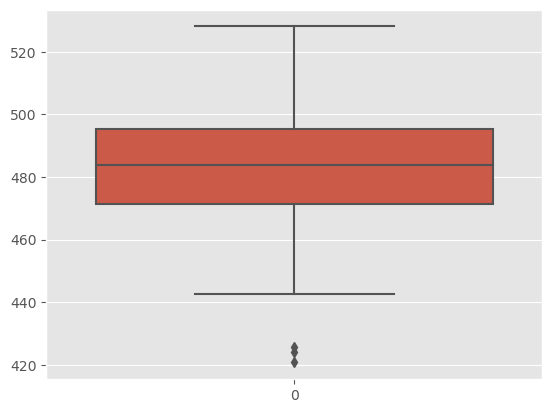

In [41]:
#boxplot with ouliers
sns.boxplot(data['Temp3'])

<Axes: >

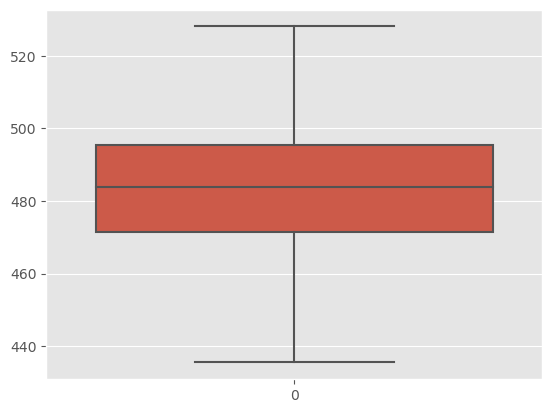

In [43]:
#boxplot without outliers
sns.boxplot(new_data)